In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from ds_gen import gen

In [37]:
c = np.array(['red', 'blue', 'green', 'black'])
cents = [(0, 1), (6, 6), (-10, 3)]
vars = [1, 2, 7]
ns = np.array([5, 10, 12])

In [38]:
dataset = {}

t_ds, t_gt = gen(cents,
				 vars,
				 ns, shuffle_flag=True)
dataset['train_samples'] = t_ds
dataset['train_labels'] = t_gt

t_ds, t_gt = gen(cents,
				 vars,
				 20*ns, shuffle_flag=True)
dataset['test_samples'] = t_ds
dataset['test_labels'] = t_gt

t_ds, t_gt = gen(cents,
				 vars,
				 20*ns, shuffle_flag=True)
dataset['available_pool_samples'] = t_ds
dataset['available_pool_labels'] = t_gt

In [39]:
import pickle

In [40]:
with open('dataset_q1.pkl', 'rb') as f:
	dataset = pickle.load(f)

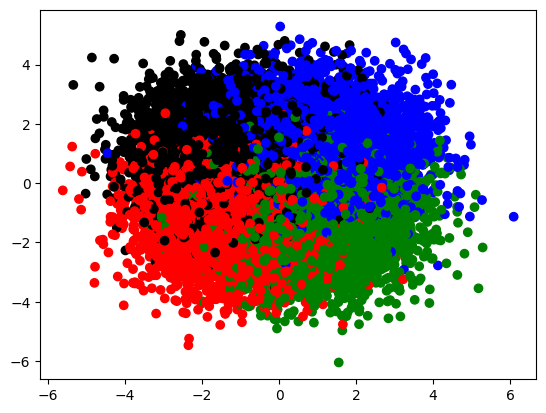

In [41]:
plt.scatter(dataset['available_pool_samples'][:, 0], dataset['available_pool_samples'][:, 1], c=c[dataset['available_pool_labels']])
plt.scatter(dataset['train_samples'][:, 0], dataset['train_samples'][:, 1], c=c[dataset['train_labels']], marker='x')

In [42]:
from ActiveLearning import ActiveLearningPipeline
from ActiveLearning_OG import AL

In [43]:
threshold = .8
iterations = 100

In [44]:
al = ActiveLearningPipeline(dataset, 
                            "LogisticRegression", 
                            "entropy_e",
							"density_kmean",
							"pagerank",
                            weighted_selection=True, 
                            iterations=iterations, 
                            budget_per_iter=2, 
                            graph_building_function="euclidean", 
                            graph_threshold=threshold)

entropy_e
density_kmean
pagerank


In [ ]:
res_gal = al.run_pipeline(n_clusters=3)

 15%|█▌        | 15/100 [03:44<14:09, 10.00s/it, Accuracy=0.614] Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002E5B923A3E0>>
Traceback (most recent call last):
  File "c:\Users\salee\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
 16%|█▌        | 16/100 [03:53<13:47,  9.85s/it, Accuracy=0.612]

In [ ]:
alal = AL(dataset, 'custom', iterations, 2, 1000)
res_al = alal.run_pipeline()

Iteration 1/100
Accuracy: 0.874
----------------------------------------
Iteration 2/100
Accuracy: 0.9
----------------------------------------
Iteration 3/100
Accuracy: 0.922
----------------------------------------
Iteration 4/100
Accuracy: 0.924
----------------------------------------
Iteration 5/100
Accuracy: 0.926
----------------------------------------
Iteration 6/100
Accuracy: 0.926
----------------------------------------
Iteration 7/100
Accuracy: 0.93
----------------------------------------
Iteration 8/100
Accuracy: 0.931
----------------------------------------
Iteration 9/100
Accuracy: 0.93
----------------------------------------
Iteration 10/100
Accuracy: 0.93
----------------------------------------
Iteration 11/100
Accuracy: 0.93
----------------------------------------
Iteration 12/100
Accuracy: 0.93
----------------------------------------
Iteration 13/100
Accuracy: 0.93
----------------------------------------
Iteration 14/100
Accuracy: 0.93
-----------------------

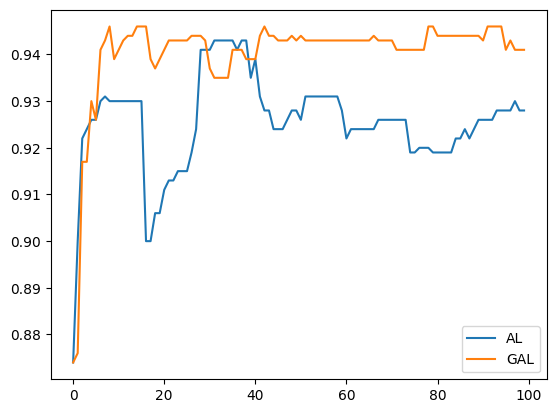

In [23]:
plt.plot(res_al, label='AL')
plt.plot(res_gal, label='GAL')
plt.legend()
plt.show()

In [49]:
trained_model = al._train_model()
trained_model

LogisticRegression()

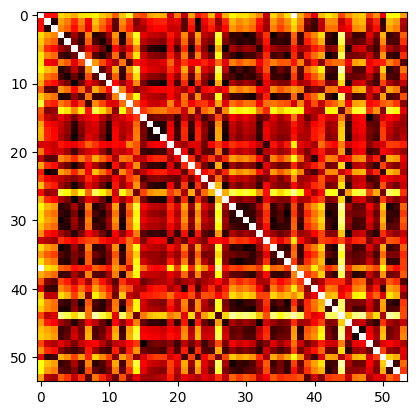

In [50]:
A = al.selection_criterion.graph_builder.similarity(al.available_pool_samples)
plt.imshow(A, cmap='hot')
plt.show()

In [51]:
E = np.vstack(np.where(A < threshold))
# E

In [52]:
nx_graph = nx.Graph()
nx_graph.add_nodes_from(range(len(al.available_pool_samples)))
nx_graph.add_edges_from(zip(*E))


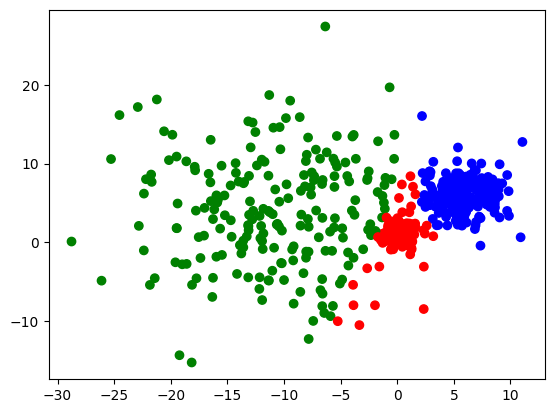

In [14]:
plt.scatter(dataset['available_pool_samples'][:, 0], dataset['available_pool_samples'][:, 1], c=c[al.model.predict(dataset['available_pool_samples'])])

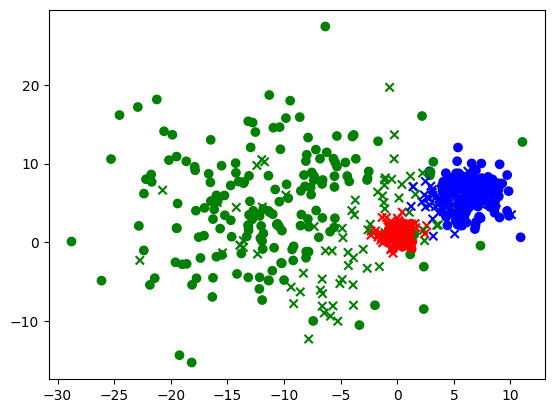

In [13]:
plt.scatter(al.available_pool_samples[:, 0], al.available_pool_samples[:, 1], c=c[al.available_pool_labels])
plt.scatter(al.train_samples[:, 0], al.train_samples[:, 1], c=c[al.train_labels], marker='x')

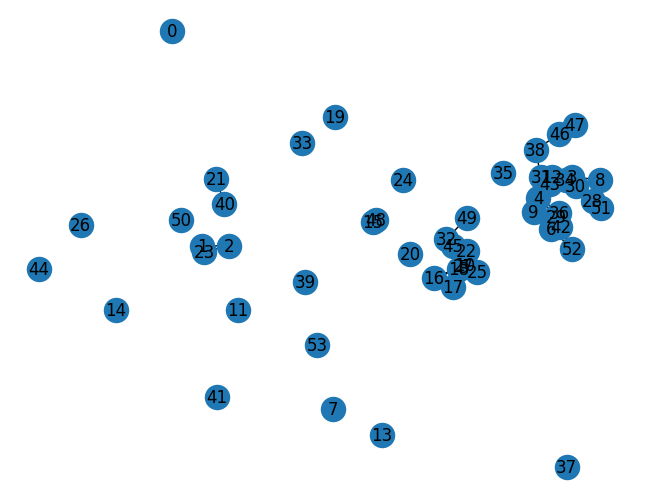

In [54]:
# pos = nx.spring_layout(nx_graph, k=.9, iterations=50)
pos = dict(zip(range(len(al.available_pool_samples)), al.available_pool_samples))
nx.draw(nx_graph, pos=pos, with_labels=True)


In [55]:
py_data, G = al.selection_criterion.graph_builder(al.available_pool_samples)
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53))

In [ ]:
uncertainty_scores = al.selection_criterion._calc_uncertainties(al.available_pool_samples,
										   labeled=None,
										   model=al.selection_criterion.model,
										   G=G,
										   n_clusters=3)

weights = np.random.beta(1, [1. / 1, 1. / 1, 1], size=(3))
weights = weights / weights.sum()


In [57]:
final_scores = al.selection_criterion.sum_dicts(uncertainty_scores, coef=weights)


In [58]:
max_v = max(final_scores.values())
for k, v in final_scores.items():
	final_scores[k] = v / max_v

In [59]:
final_scores

{0: 0.7837350588641914,
 1: 0.4560362665935914,
 2: 0.5421772852146701,
 3: 0.23383594692119755,
 4: 0.643458129119921,
 5: 0.7955350149347262,
 6: 0.7248322549504057,
 7: 0.06594131020458671,
 8: 0.15843201817523964,
 9: 0.8815161193313205,
 10: 0.7799677867364438,
 11: 0.16241756177282693,
 12: 0.33654627303611134,
 13: 0.05584506853945019,
 14: 0.10390048136479976,
 15: 0.929800926959956,
 16: 0.9880930978348443,
 17: 1.0,
 18: 0.8530100407306103,
 19: 0.3724364110640854,
 20: 0.9584153957985241,
 21: 0.20968784272453347,
 22: 0.7075672957192569,
 23: 0.4686336705949477,
 24: 0.4174470046422908,
 25: 0.7599157891649746,
 26: 0.09406659873787611,
 27: 0.7957538549798304,
 28: 0.1986353346445186,
 29: 0.5429771754439203,
 30: 0.24160780286593522,
 31: 0.43020045430346254,
 32: 0.6721625028309777,
 33: 0.9245952337310704,
 34: 0.26314253544883937,
 35: 0.8514155571734098,
 36: 0.4766620871616123,
 37: 0.34046428363125836,
 38: 0.29522273514456693,
 39: 0.1459689089770638,
 40: 0.264498

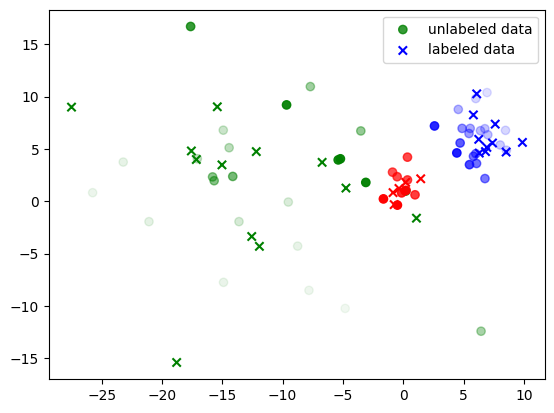

In [60]:
plt.scatter(al.available_pool_samples[:, 0], al.available_pool_samples[:, 1], c=c[al.available_pool_labels], alpha=list(final_scores.values()), label='unlabeled data')
plt.scatter(al.train_samples[:, 0], al.train_samples[:, 1], c=c[al.train_labels], marker='x', label='labeled data')

plt.legend()
plt.show()


In [ ]:
plt.scatter()

In [104]:
import torch

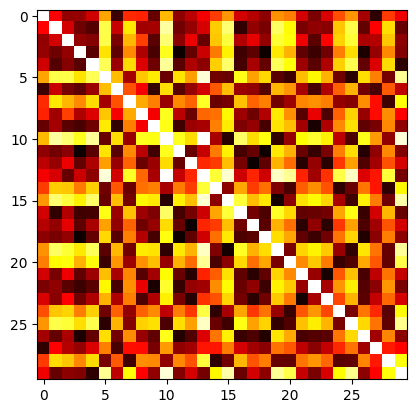

In [23]:
affine_matrix = al.selection_criterion.graph_builder.similarity(al.available_pool_samples)
plt.imshow(affine_matrix, cmap='hot')

In [24]:
E = np.vstack(np.where(affine_matrix < al.selection_criterion.graph_builder.threshold))
E.shape

(2, 184)

In [120]:
range(len(al.available_pool_samples))

range(0, 30)

In [121]:

nx_graph = nx.Graph()
nx_graph.nodes

NodeView(())

In [122]:
nx_graph.add_nodes_from(range(len(al.available_pool_samples)))
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [118]:
# list(zip(*E))

In [123]:
nx_graph.add_edges_from(zip(*E))
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [124]:
nx_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [ ]:


res = al.run_pipeline()

print(res)

entropy_e


100%|██████████| 10/10 [00:00<00:00, 72.87it/s, Accuracy=1]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
